In [1]:
import pandas as pd

datos = pd.read_csv('dataframe.csv',sep=',')

In [2]:
datos

,Unnamed: 0,LanguageName,Latitude,Longitude,WordModernName1,Phonetic,SpellingAltv1,source_csv
0,0,Ref. Spelling,-40.00000,-75.50000,ellos,fëjëŋɘn,feyengün,12-feyengün.csv
1,1,Santa Bárbara,-37.67405,-71.80186,ellos,ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
2,2,Cañete,-37.96722,-73.39282,ellos,cʰɪ.ˈðwɪ.ŋɘn,NaN,12-feyengün.csv
3,3,Tirúa,-38.36990,-73.49067,ellos,ˈɸë.jë.ɣ̞ɐ̝,NaN,12-feyengün.csv
4,4,Alto Bío Bío,-38.04457,-71.36344,ellos,m̩.ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
...,...,...,...,...,...,...,...,...
1336,1336,Huiliches,-39.63992,-71.18686,vino,pʊl.ˈkʊ,NaN,9-pulkü.csv
1337,1337,Jacobacci,-41.28813,-69.55719,vino,ɸʊl.ˈkʰʊ,NaN,9-pulkü.csv
1338,1338,Cushamen,-42.23392,-71.34994,vino,pʰʊl.ˈkʰʊ,NaN,9-pulkü.csv
1339,1339,Futaleufú,-42.95052,-71.18351,vino,ɸʊl.ˈxʊ,NaN,9-pulkü.csv


In [3]:
names = set(datos['LanguageName'])

In [4]:
latitud = dict(zip(datos['LanguageName'],datos['Latitude']))
longitud = dict(zip(datos['LanguageName'],datos['Longitude']))

In [5]:
!pip install haversine

In [6]:
from haversine import haversine

dist_ref = {}

for name in names:
    dist_ref[name]=haversine((latitud['Ref. Spelling'],longitud['Ref. Spelling']),(latitud[name],longitud[name]))

In [7]:
dict(sorted(dist_ref.items(), key=lambda item: item[1]))

{'Ref. Spelling': 0.0,
 'S. Juan de la Costa': 177.2301646411767,
 'San Pablo': 187.52961105844628,
 'Mariquina': 200.66463550716253,
 'Valdivia': 218.12032841870442,
 'Nueva Toltén': 221.15562634114468,
 'Puerto Saavedra': 225.5252027037372,
 'Tirúa': 250.67761263456197,
 'Freire': 250.96348222924908,
 'Lanco': 266.94833257084656,
 'Chol Chol': 272.9018985250136,
 'Dollinco': 273.13440851944256,
 'Villarrica': 279.16837427982796,
 'Cañete': 290.2632931832423,
 'Panguipulli': 292.749353721012,
 'Galvarino': 293.40598618706326,
 'Truf Truf': 297.1690821506928,
 'Lumaco': 302.4937108473996,
 'Vilcún': 315.5253689601365,
 'Cunco': 320.0409799366874,
 'Victoria': 338.71066341320477,
 'Angol': 340.3195155866509,
 'Ercilla': 341.54143070236387,
 'Curarrehue': 342.7200756940107,
 'Junín de los Andes': 359.79125763113615,
 'Huiliches': 370.4940777627709,
 'Aluminé': 391.207483327272,
 'Lonquimay': 396.4700944105974,
 'Icalma': 397.1683552087326,
 'Santa Bárbara': 411.623510725252,
 'Alto Bío B

In [8]:
names

{'Alto Bío Bío',
 'Aluminé',
 'Angol',
 'Cañete',
 'Chalileo',
 'Chol Chol',
 'Cunco',
 'Curarrehue',
 'Cushamen',
 'Dollinco',
 'Ercilla',
 'Freire',
 'Futaleufú',
 'Galvarino',
 'Huiliches',
 'Icalma',
 'Jacobacci',
 'Junín de los Andes',
 'Lago Rosario',
 'Lanco',
 'Lonquimay',
 'Lumaco',
 'Mariquina',
 'Nueva Toltén',
 'Panguipulli',
 'Picunches',
 'Puerto Saavedra',
 'Ref. Spelling',
 'S. Juan de la Costa',
 'San Pablo',
 'Santa Bárbara',
 'Tirúa',
 'Truf Truf',
 'Valdivia',
 'Victoria',
 'Vilcún',
 'Villarrica',
 'Zapala'}

In [9]:
palabras = set(datos['WordModernName1'])

In [10]:
palabras

{'amigo',
 'bajar',
 'boca',
 'bueno',
 'cama',
 'camino',
 'campo',
 'cochayuyo',
 'cola',
 'coser',
 'cuerno',
 'dia',
 'ellos',
 'estrella',
 'fuego',
 'grande',
 'harina_tostada',
 'hoja',
 'lengua',
 'lenya',
 'llorar',
 'luna',
 'mano',
 'matar',
 'negro',
 'noble',
 'nombre',
 'nube',
 'persona_que_ensenya',
 'pie',
 'puerta',
 'rojo',
 'saber',
 'sangre',
 'sol',
 'tengo_hambre',
 'tres',
 'vestido_lana',
 'vino',
 'zorro'}

In [11]:
palabras_elegidas = ['rojo'] ## puedes agregar más

In [12]:
dict_datos = {L:{} for L in names}

In [13]:
for L in names:
    for word in palabras_elegidas:
        D = datos[datos['LanguageName']==L]
        try:
            dict_datos[L][word]=list(D[D['WordModernName1']==word]['Phonetic'])[0]
        except IndexError:
            pass#dict_datos[L][word]='unk'

In [14]:
set_palabras = []

for L in names:
    set_palabras+=[list(dict_datos[L].keys())]

In [15]:
set_palabras = list(set.intersection(*map(set,set_palabras)))

In [16]:
set_palabras

['rojo']

In [17]:
dict_datos = {name:{word:dict_datos[name][word] for word in set_palabras} for name in names}

In [18]:
dict_datos['San Pablo']

{'rojo': 'ˈkʰëj.ʝʊ'}

In [19]:
dict_datos['S. Juan de la Costa']

{'rojo': 'ˈkʰë.ɮɪ'}

In [20]:
import itertools
pares_localidades = list(itertools.product(list(dict_datos.keys()), list(dict_datos.keys())))

In [21]:
pares_localidades

[('Cañete', 'Cañete'),
 ('Cañete', 'Victoria'),
 ('Cañete', 'Picunches'),
 ('Cañete', 'Santa Bárbara'),
 ('Cañete', 'Jacobacci'),
 ('Cañete', 'S. Juan de la Costa'),
 ('Cañete', 'Tirúa'),
 ('Cañete', 'Galvarino'),
 ('Cañete', 'Cunco'),
 ('Cañete', 'Lanco'),
 ('Cañete', 'San Pablo'),
 ('Cañete', 'Curarrehue'),
 ('Cañete', 'Freire'),
 ('Cañete', 'Alto Bío Bío'),
 ('Cañete', 'Zapala'),
 ('Cañete', 'Lumaco'),
 ('Cañete', 'Huiliches'),
 ('Cañete', 'Cushamen'),
 ('Cañete', 'Panguipulli'),
 ('Cañete', 'Dollinco'),
 ('Cañete', 'Aluminé'),
 ('Cañete', 'Ercilla'),
 ('Cañete', 'Lago Rosario'),
 ('Cañete', 'Ref. Spelling'),
 ('Cañete', 'Nueva Toltén'),
 ('Cañete', 'Vilcún'),
 ('Cañete', 'Futaleufú'),
 ('Cañete', 'Valdivia'),
 ('Cañete', 'Truf Truf'),
 ('Cañete', 'Chalileo'),
 ('Cañete', 'Icalma'),
 ('Cañete', 'Lonquimay'),
 ('Cañete', 'Mariquina'),
 ('Cañete', 'Chol Chol'),
 ('Cañete', 'Angol'),
 ('Cañete', 'Villarrica'),
 ('Cañete', 'Puerto Saavedra'),
 ('Cañete', 'Junín de los Andes'),
 ('Victor

In [22]:
## aquí guardas las distancias

distancias = {L:{LL:0 for LL in list(dict_datos.keys())} for L in list(dict_datos.keys())}

In [23]:
!pip install jellyfish

In [24]:
import jellyfish

def funcion_distancia(string1,string2):
    #return 1-jellyfish.jaro_winkler_similarity(string1,string2)
    return jellyfish.levenshtein_distance(string1,string2)/(max(len(string1),len(string2)))

In [25]:
## tienes q recorrer pares_localidades

for par in pares_localidades:
    D = 0
    words1 = dict_datos[par[0]]
    words2 = dict_datos[par[1]]
    words1and2 = list(set(words1) & set(words2))
    for word in words1and2:
        D += funcion_distancia(dict_datos[par[0]][word],dict_datos[par[1]][word])
    distancias[par[0]][par[1]]=D/len(words1and2)

In [26]:
distancias['Ref. Spelling']

{'Cañete': 0.5,
 'Victoria': 0.375,
 'Picunches': 0.42857142857142855,
 'Santa Bárbara': 0.375,
 'Jacobacci': 0.5,
 'S. Juan de la Costa': 0.625,
 'Tirúa': 0.6666666666666666,
 'Galvarino': 0.625,
 'Cunco': 0.5,
 'Lanco': 0.375,
 'San Pablo': 0.6666666666666666,
 'Curarrehue': 0.375,
 'Freire': 0.375,
 'Alto Bío Bío': 0.375,
 'Zapala': 0.42857142857142855,
 'Lumaco': 0.5555555555555556,
 'Huiliches': 0.5,
 'Cushamen': 0.375,
 'Panguipulli': 0.5,
 'Dollinco': 0.5,
 'Aluminé': 0.5,
 'Ercilla': 0.5,
 'Lago Rosario': 0.5,
 'Ref. Spelling': 0.0,
 'Nueva Toltén': 0.2857142857142857,
 'Vilcún': 0.375,
 'Futaleufú': 0.5,
 'Valdivia': 0.5,
 'Truf Truf': 0.375,
 'Chalileo': 0.5,
 'Icalma': 0.2857142857142857,
 'Lonquimay': 0.5,
 'Mariquina': 0.5,
 'Chol Chol': 0.5,
 'Angol': 0.375,
 'Villarrica': 0.375,
 'Puerto Saavedra': 0.5,
 'Junín de los Andes': 0.42857142857142855}

In [27]:
dict_geo_fon = {}

for localidad in distancias['Ref. Spelling'].keys():
    dict_geo_fon[localidad]=[dist_ref[localidad],distancias['Ref. Spelling'][localidad]]

In [28]:
X = [dict_geo_fon[localidad][0] for localidad in dict_geo_fon.keys()]
Y = [dict_geo_fon[localidad][1] for localidad in dict_geo_fon.keys()]

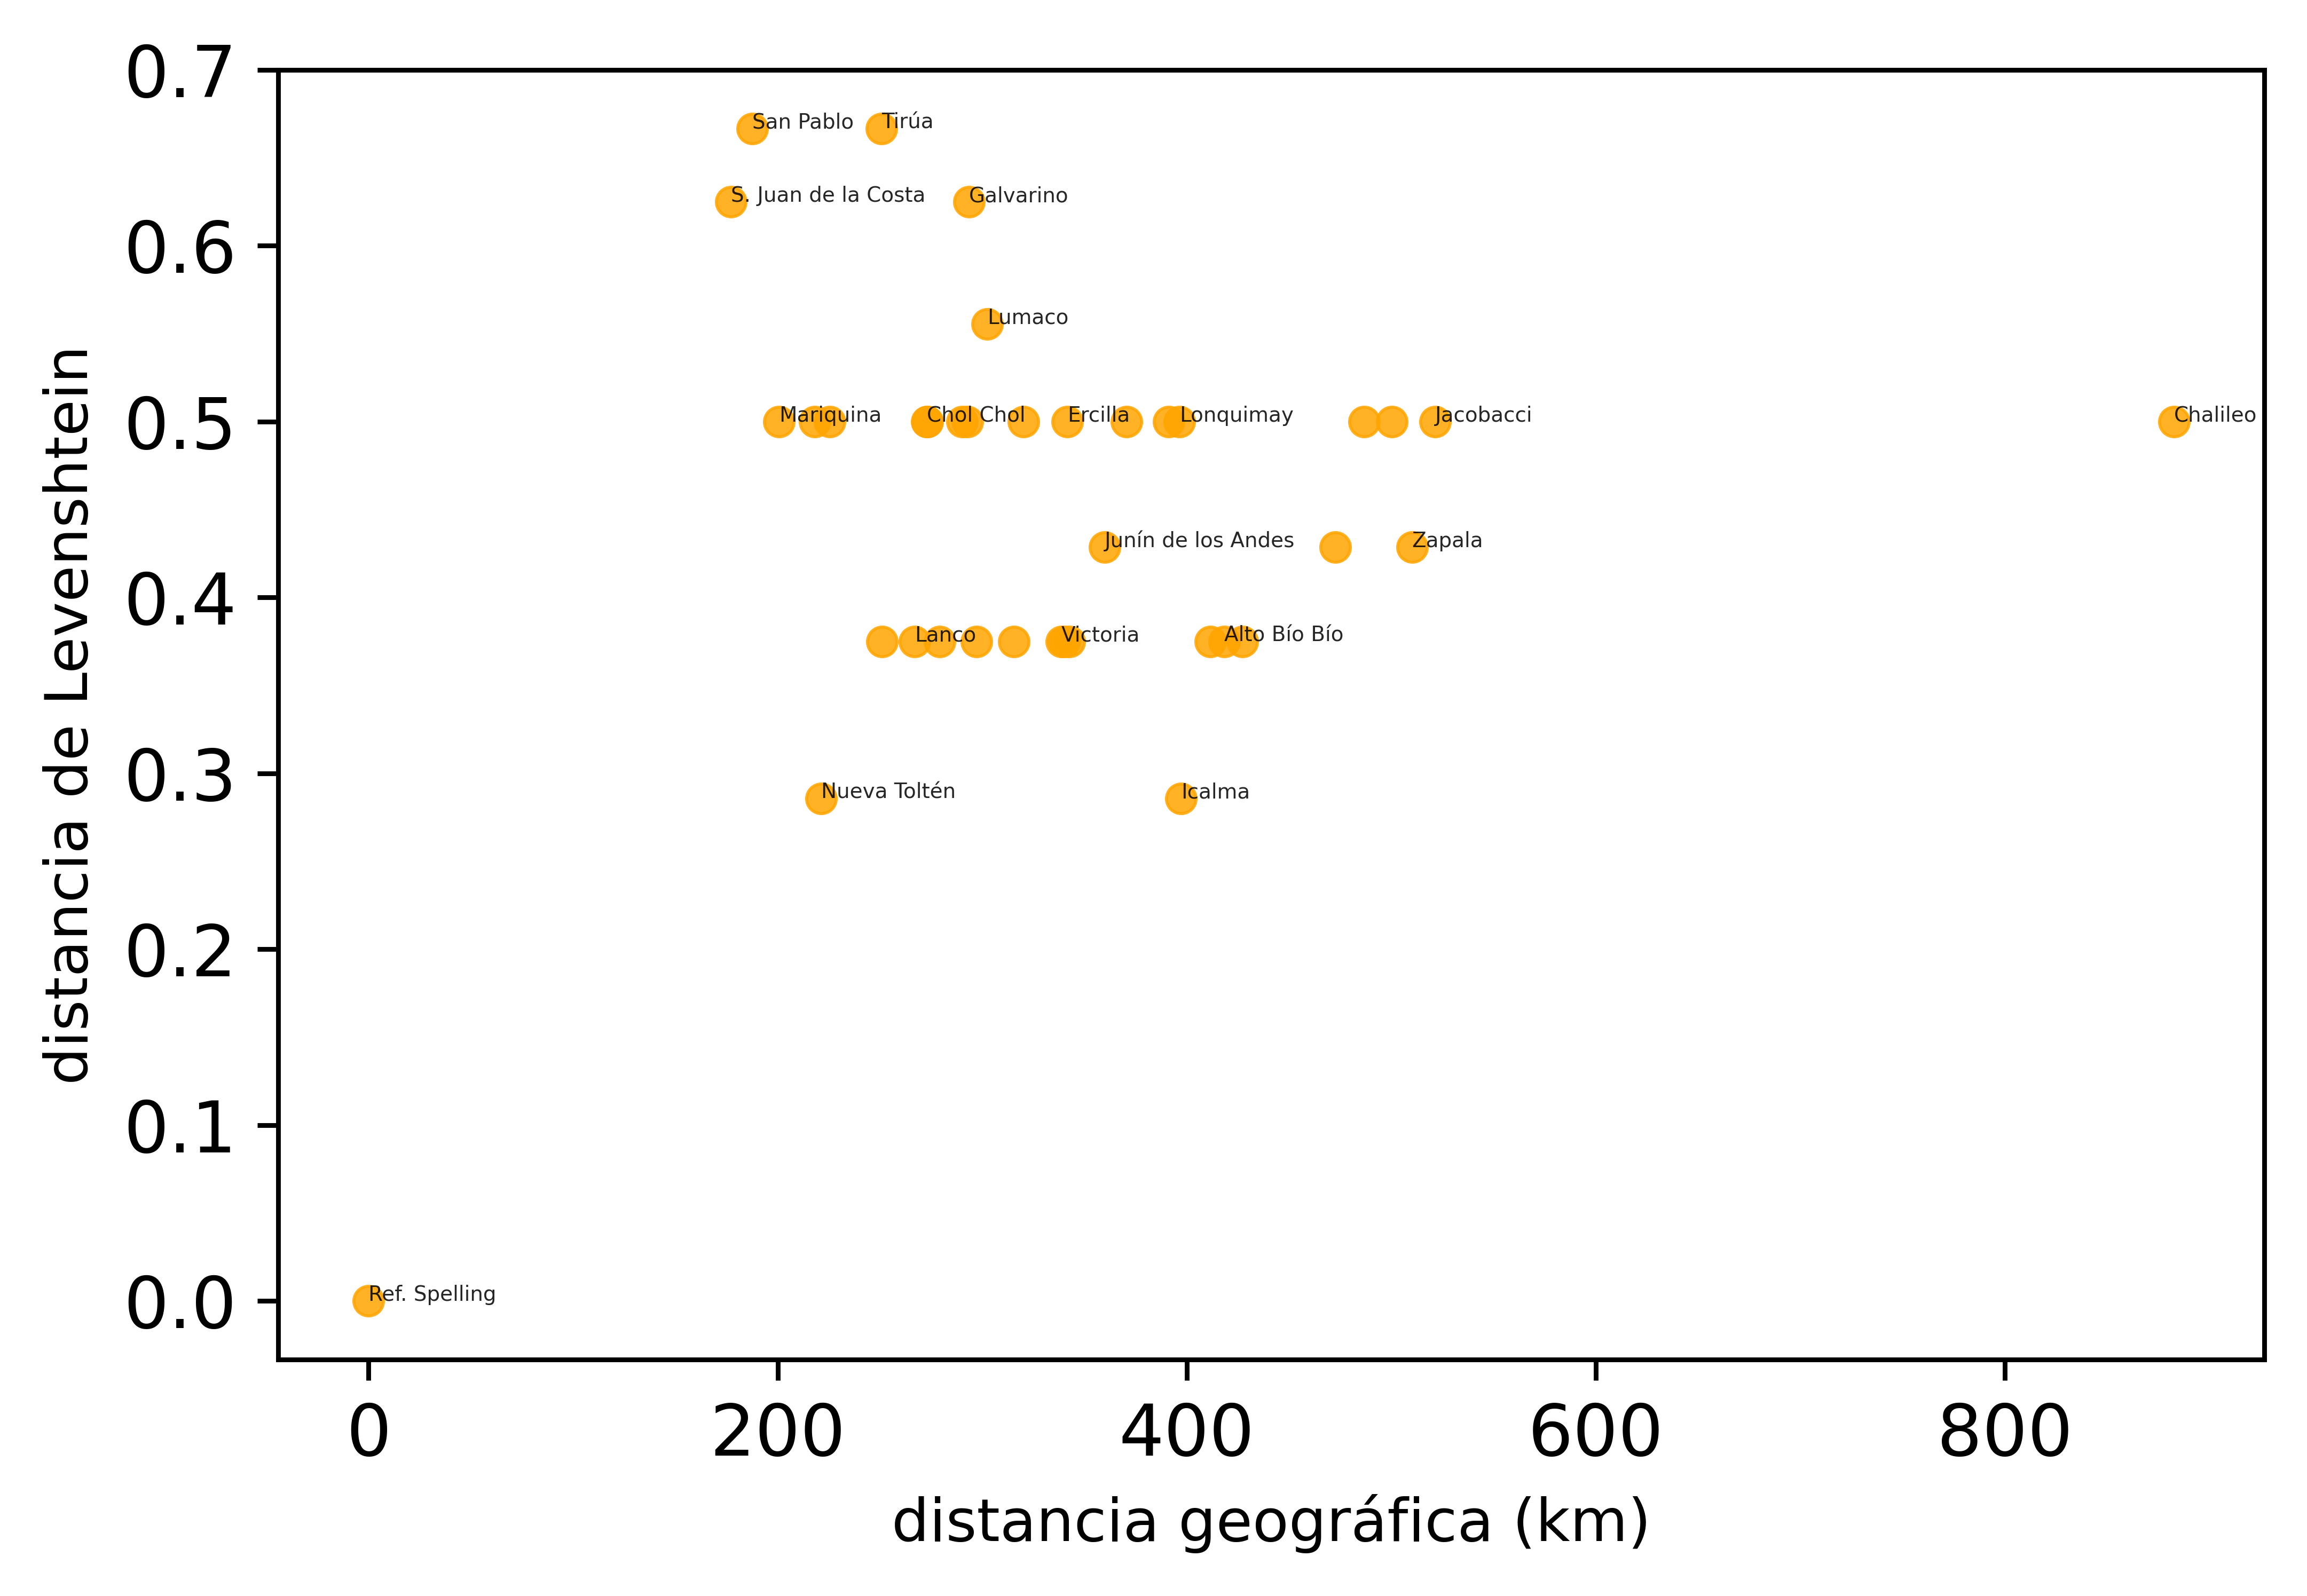

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for localidad in dict_geo_fon.keys():
    i = list(dict_geo_fon.keys()).index(localidad)
    if localidad in ['Ref. Spelling','Victoria','Lonquimay','Alto Bío Bío','Ercilla','Galvarino','Tirúa','S. Juan de la Costa','San Pablo','Mariquina','Chalileo','Nueva Toltén',
 'Lumaco','Tirúa','Zapala','Jacobacci','Lanco','Chol Chol','Icalma', 'Zapala', 'Junín de los Andes', '', '']:
        ax.annotate(localidad, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Levenshtein',fontsize=10)
plt.xlabel(r'distancia geográfica (km)',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('geo_Lev_rojo.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [62]:
DF = pd.DataFrame.from_dict(distancias)

In [63]:
DF

,Cañete,Victoria,Picunches,Santa Bárbara,Jacobacci,S. Juan de la Costa,Tirúa,Galvarino,Cunco,Lanco,...,Truf Truf,Chalileo,Icalma,Lonquimay,Mariquina,Chol Chol,Angol,Villarrica,Puerto Saavedra,Junín de los Andes
Cañete,0.000000,0.375000,0.500000,0.125000,0.250000,0.375000,0.222222,0.125000,0.500000,0.125000,...,0.375000,0.500000,0.500000,0.000000,0.250000,0.250000,0.375000,0.375000,0.250000,0.375000
Victoria,0.375000,0.000000,0.250000,0.250000,0.125000,0.500000,0.555556,0.500000,0.125000,0.250000,...,0.000000,0.125000,0.125000,0.375000,0.375000,0.125000,0.000000,0.000000,0.125000,0.250000
Picunches,0.500000,0.250000,0.000000,0.500000,0.250000,0.750000,0.666667,0.625000,0.375000,0.500000,...,0.250000,0.375000,0.142857,0.500000,0.625000,0.250000,0.250000,0.250000,0.250000,0.142857
Santa Bárbara,0.125000,0.250000,0.500000,0.000000,0.375000,0.250000,0.333333,0.250000,0.375000,0.000000,...,0.250000,0.375000,0.375000,0.125000,0.125000,0.375000,0.250000,0.250000,0.375000,0.500000
Jacobacci,0.250000,0.125000,0.250000,0.375000,0.000000,0.625000,0.444444,0.375000,0.250000,0.375000,...,0.125000,0.250000,0.250000,0.250000,0.500000,0.000000,0.125000,0.125000,0.000000,0.125000
S. Juan de la Costa,0.375000,0.500000,0.750000,0.250000,0.625000,0.000000,0.444444,0.375000,0.500000,0.250000,...,0.500000,0.500000,0.625000,0.375000,0.125000,0.625000,0.500000,0.500000,0.625000,0.750000
Tirúa,0.222222,0.555556,0.666667,0.333333,0.444444,0.444444,0.000000,0.222222,0.555556,0.333333,...,0.555556,0.555556,0.666667,0.222222,0.333333,0.444444,0.555556,0.555556,0.444444,0.555556
Galvarino,0.125000,0.500000,0.625000,0.250000,0.375000,0.375000,0.222222,0.000000,0.375000,0.250000,...,0.500000,0.375000,0.625000,0.125000,0.250000,0.375000,0.500000,0.500000,0.375000,0.500000
Cunco,0.500000,0.125000,0.375000,0.375000,0.250000,0.500000,0.555556,0.375000,0.000000,0.375000,...,0.125000,0.000000,0.250000,0.500000,0.375000,0.250000,0.125000,0.125000,0.250000,0.375000
Lanco,0.125000,0.250000,0.500000,0.000000,0.375000,0.250000,0.333333,0.250000,0.375000,0.000000,...,0.250000,0.375000,0.375000,0.125000,0.125000,0.375000,0.250000,0.250000,0.375000,0.500000


In [65]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import numpy as np

def mapa_calor(D):
    
    
    linkage = hc.linkage(sp.distance.squareform(DF), method='ward')
        
    plt.figure(figsize=(10,10))
    cg=sns.clustermap(D,cmap='OrRd',row_linkage=linkage, col_linkage=linkage,linewidth=1,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
       
    plt.rcParams.update({'font.size': 12})
    plt.savefig('heatmap_rojo.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)

<Figure size 720x720 with 0 Axes>

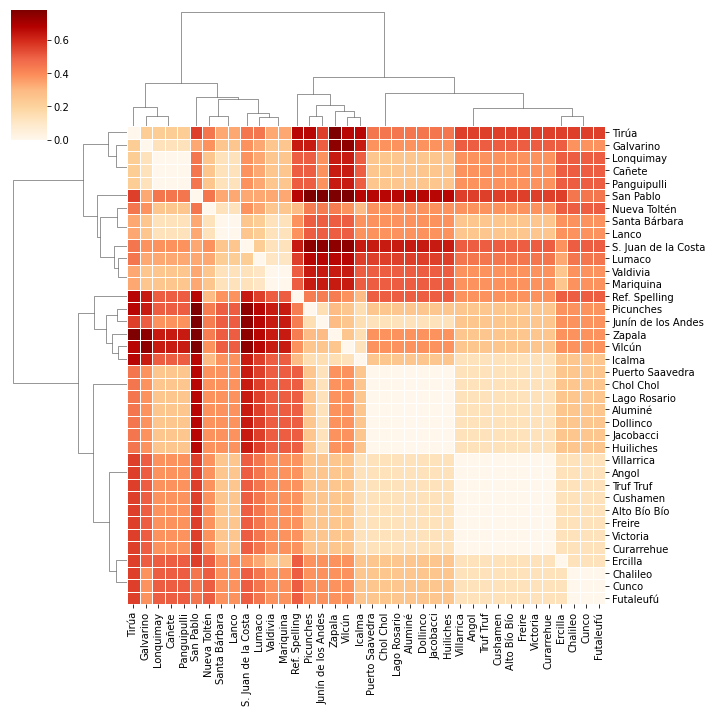

In [60]:
mapa_calor(distancias)

In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

labels_dict = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
S = []
for n_clusters in range_n_clusters:
    
    cluster = KMeans(n_clusters=n_clusters)#, linkage='ward')
    distArray = sp.distance.squareform(DF.to_numpy())
    cluster_labels = cluster.fit_predict(DF.values)
    labels_dict[n_clusters]=cluster_labels
    silhouette_avg = silhouette_score(DF.values, cluster_labels, metric = 'precomputed')
    S.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5421052011346781
For n_clusters = 3 The average silhouette_score is : 0.48204687158610077
For n_clusters = 4 The average silhouette_score is : 0.4339464462804208
For n_clusters = 5 The average silhouette_score is : 0.486976759885436
For n_clusters = 6 The average silhouette_score is : 0.5219901449118399
For n_clusters = 7 The average silhouette_score is : 0.5136739429883344
For n_clusters = 8 The average silhouette_score is : 0.5145309304595709
For n_clusters = 9 The average silhouette_score is : 0.5378719474257773
For n_clusters = 10 The average silhouette_score is : 0.6015303057198864
